In [304]:
# The dataset is taken from https://www.kaggle.com/mlg-ulb/creditcardfraud
# Some part of the code is obtained from https://www.kaggleusercontent.com/kf/16695845/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JPkYlJt0Ot2N9JTMkh46zA.Mc-LtsEZIGvXv0gjnqvnJflm-fHeHCH1lGMnX15-dA5UhGJrTfbefbLM3u9qikTsDEXJQMWiIKvEGDjQ9Iv8p9E8D8J1NiNPAN3oD411bh19ie0g9kekSmbqtl2fOd102MN03VhtUCuMryAWZKJYRxP5yV-BEfNoxoyun5t4Vc0YkHIvL-dv6JAS-lGcPUt8pc4RI6Vy_Op5yVmkRSf79w.PPgNTOrG7JoJ4KWb0Te_Uw/__results__.html#gather

import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import collections

In [305]:
#https://www.kaggle.com/mlg-ulb/creditcardfraud
df_credit_card = pd.read_csv('./dataset/creditcard.csv')

In [306]:
df_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [307]:
df_credit_card.shape

(284807, 31)

In [308]:
df_credit_card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n 0: Legitimate, 1: Fraud')

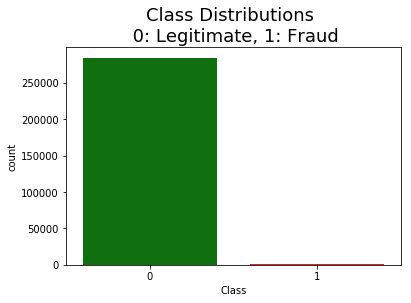

In [309]:
colors = ["green", "red"]
sns.countplot('Class', data=df_credit_card, palette=colors)
plt.title('Class Distributions \n 0: Legitimate, 1: Fraud', fontsize=18)

In [310]:
print('Legitimate Cases:', round(df_credit_card['Class'].value_counts()[0] / df_credit_card.shape[0] * 100, 2))
print('Fraud Cases:', round(df_credit_card['Class'].value_counts()[1] / df_credit_card.shape[0] * 100, 2))

Legitimate Cases: 99.83
Fraud Cases: 0.17


Most of the transactions are Legitimate (99.83%). If we use this dataset for a predictive model we might get a lots of errors and algorithms overfits since it will assume that most transactions are Legitimate. 
However, we do not want our model to work like that, instead we want a model to detect patterns that provides signs of fraud.

In [311]:
df_credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [312]:
df.isnull().sum()

scaled_amount    0
scaled_time      0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64

In [313]:
print(df_credit_card.Time[df_credit_card.Class == 1].describe())

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


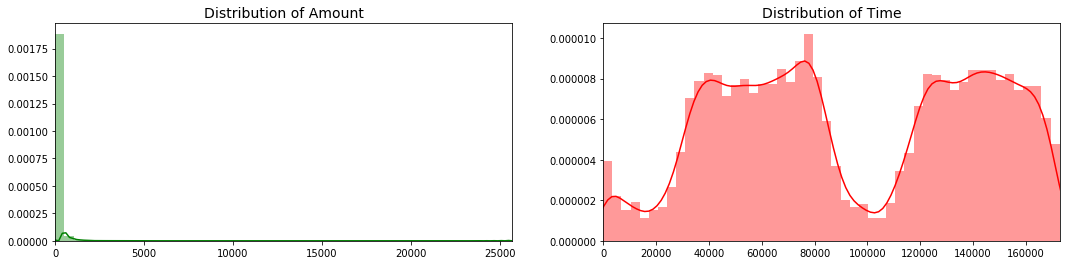

In [314]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount = df_credit_card['Amount'].values
time = df_credit_card['Time'].values

sns.distplot(amount, ax=ax[0], color='g')
ax[0].set_title('Distribution of Amount', fontsize=14)
ax[0].set_xlim([min(amount), max(amount_val)])

sns.distplot(time, ax=ax[1], color='red')
ax[1].set_title('Distribution of Time', fontsize=14)
ax[1].set_xlim([min(time), max(time)])

plt.show()

### Scaling and Distributing

we need to scale the columns which has Time and Amount (Time and amount should be scaled).
Then, we need to create a sub sample of the dataframe to have an equal amount of Fraud and Legitimate transactions. It helps the model to better understand patterns that determines if a transaction is a fraud or Legitimate.


### What is the Resampling?
As you can see, the non-fraud transactions far outweigh the fraud transactions. If we train a binary classification model without fixing this problem, the model will be completely biased. It also impacts the correlations between features and I will show you how and why later on.

In this case, our resampling will be a dataframe with a 50/50 ratio of fraud and Legitimate transactions. Other words, the resampling should have the same amount of fraud and Legitimate transactions.

We have two options here: Undersampling or Oversampling:

<b>Undersampling</b> is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class

<b> Oversampling </b> is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. There are a number of methods used to oversample a dataset for a typical classification problem. The most common technique is called SMOTE (Synthetic Minority Over-sampling Technique).

### Why do we create a Resampling?

Because the original dataframe is imbalanced! Using the original dataset can cause the following problems:

<b>Overfitting:</b> Our classification model assume that in most cases there is no fraud! What we want for our model is to be certain when a fraud occurs.

<b>Wrong Correlations: </b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

In [315]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_credit_card['scaled_amount'] = robust_scaler.fit_transform(df_credit_card['Amount'].values.reshape(-1,1))
df_credit_card['scaled_time'] = robust_scaler.fit_transform(df_credit_card['Time'].values.reshape(-1,1))
df_credit_card.drop(['Time','Amount'], axis=1, inplace=True)

In [316]:
df_credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [317]:
# move two scaled columns to the first two columns of the dataset
scaled_amount = df_credit_card['scaled_amount']
scaled_time = df_credit_card['scaled_time']

df_credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df_credit_card.insert(0, 'scaled_amount', scaled_amount)
df_credit_card.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting Data (Original DataFrame)

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

y = df_credit_card['Class']
X = df_credit_card.drop('Class', axis=1)

SKF = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in SKF.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish 
# and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, 
#random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)


print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### RandomUnder-Sampling:
We want to implement "Random Under Sampling" which consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfit.

1. Determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)

2. Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.

3. Now, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

In [319]:
df_credit_card = df_credit_card.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_credit_card.loc[df['Class'] == 1]
non_fraud_df = df_credit_card.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
259765,1.788584,0.876091,1.788446,-0.062577,-2.233396,1.137985,0.846235,-0.885523,1.034143,-0.476446,...,0.086284,0.290941,0.643978,-0.272518,-0.451066,0.572196,-0.423820,-0.064041,-0.054599,0
149522,0.428841,0.078890,-3.951209,2.881805,-6.421490,2.434181,-1.327325,-2.122106,-3.227533,-0.685560,...,-0.669351,1.410479,0.279403,0.570821,0.656271,-0.298601,-0.407571,-1.378703,1.379130,1
58007,-0.139733,-0.428858,1.161234,0.152668,0.580785,1.074154,-0.409572,-0.398730,-0.124912,0.078319,...,-0.247598,-0.262937,-0.829144,0.188196,-0.014002,0.160920,-0.659651,0.035014,0.027750,0
233258,13.613778,0.737896,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,...,2.425677,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,1
153823,-0.275554,0.182462,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,...,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1


In [320]:
new_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [321]:
new_df.shape

(984, 31)

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)



Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


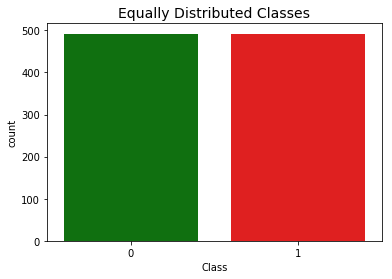

In [322]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

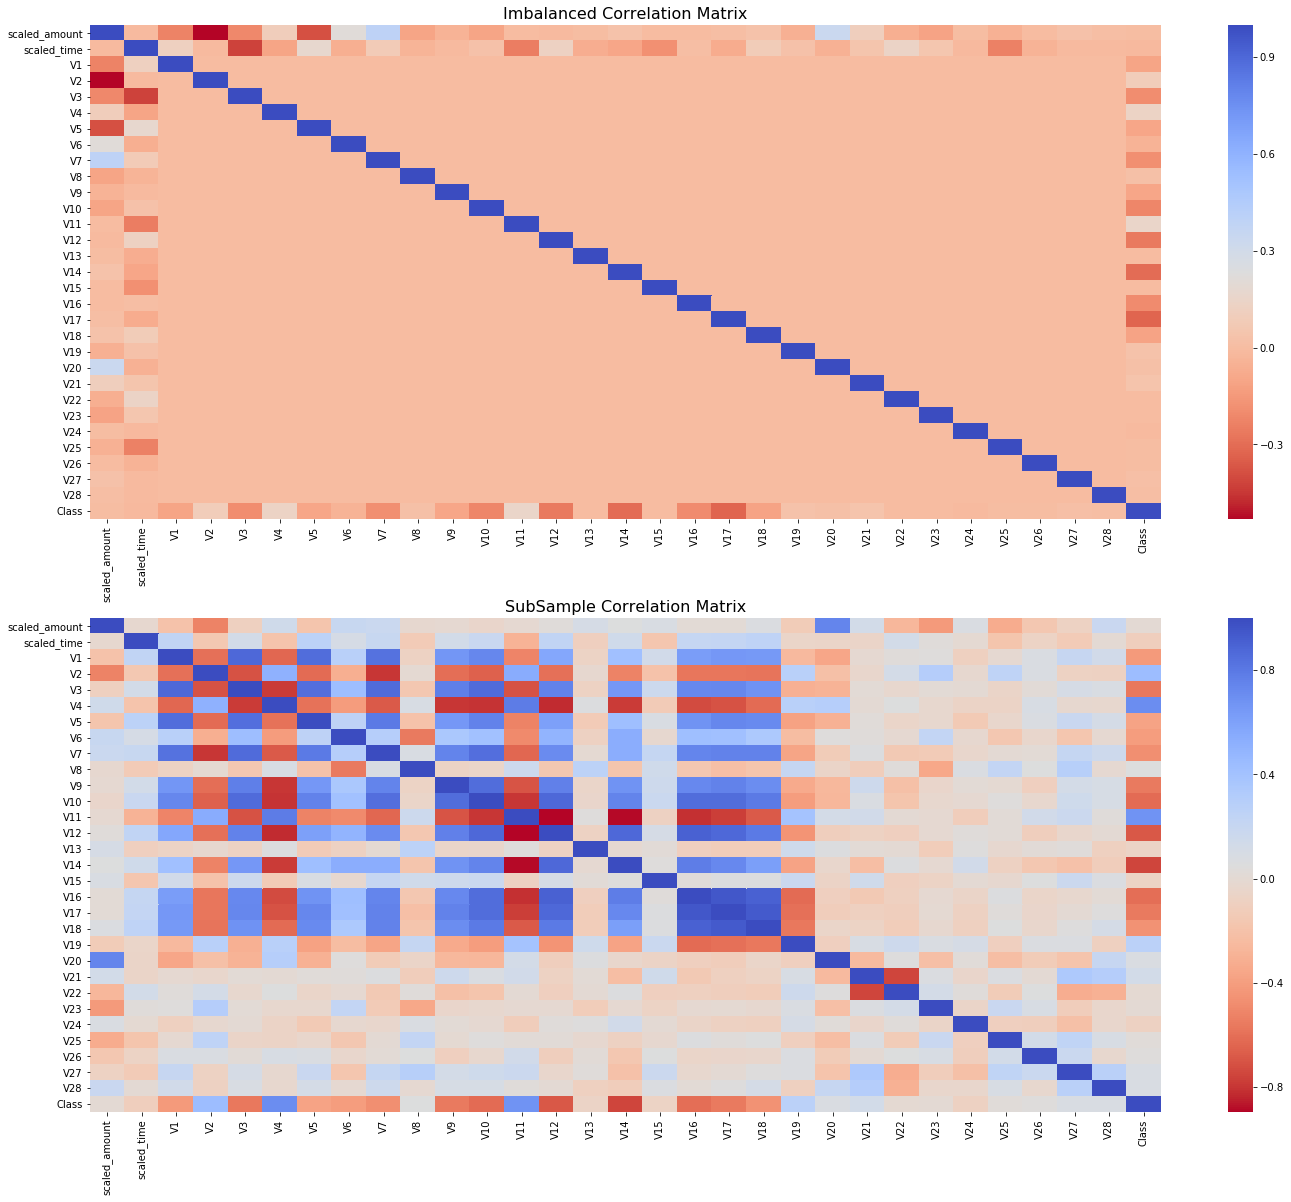

In [323]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df_credit_card.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':18}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=16)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':18}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=16)
plt.show()

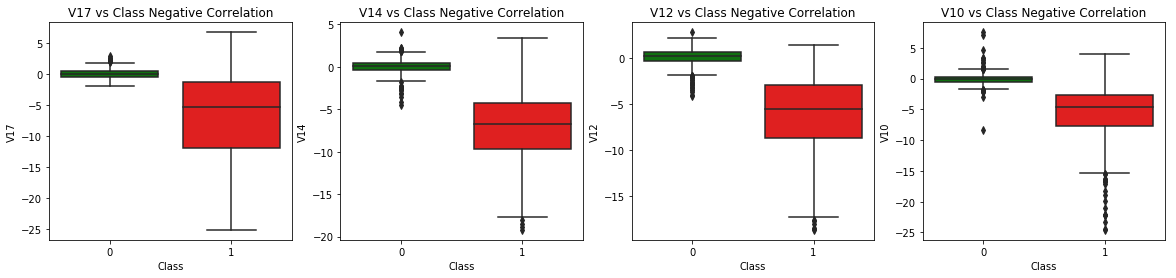

In [324]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

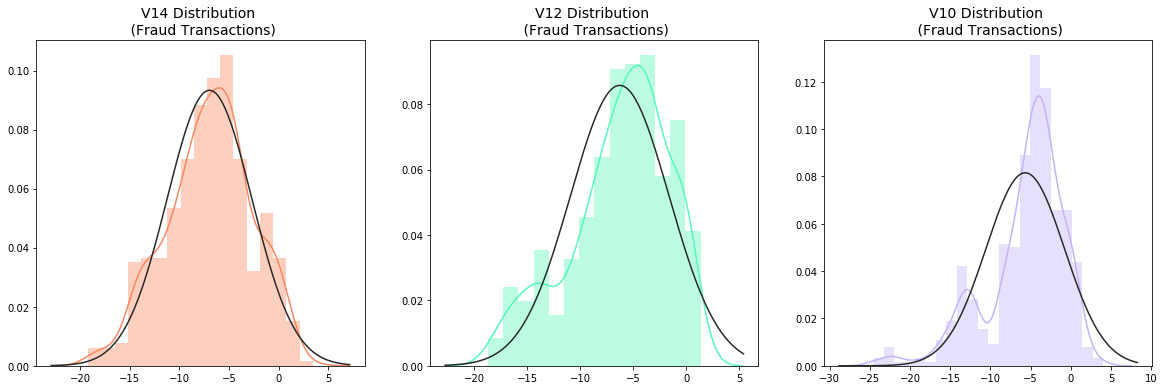

In [325]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [326]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of:", round(training_score.mean(), 2) * 100, "% accuracy score")


/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

Classifier:  LogisticRegression has a training score of: 95.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of: 93.0 % accuracy score
Classifier:  SVC has a training score of: 93.0 % accuracy score
Classifier:  DecisionTreeClassifier has a training score of: 89.0 % accuracy score
